In [249]:
from PIL import Image
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pylab as plt



# Importing image to find the edges of via clustering

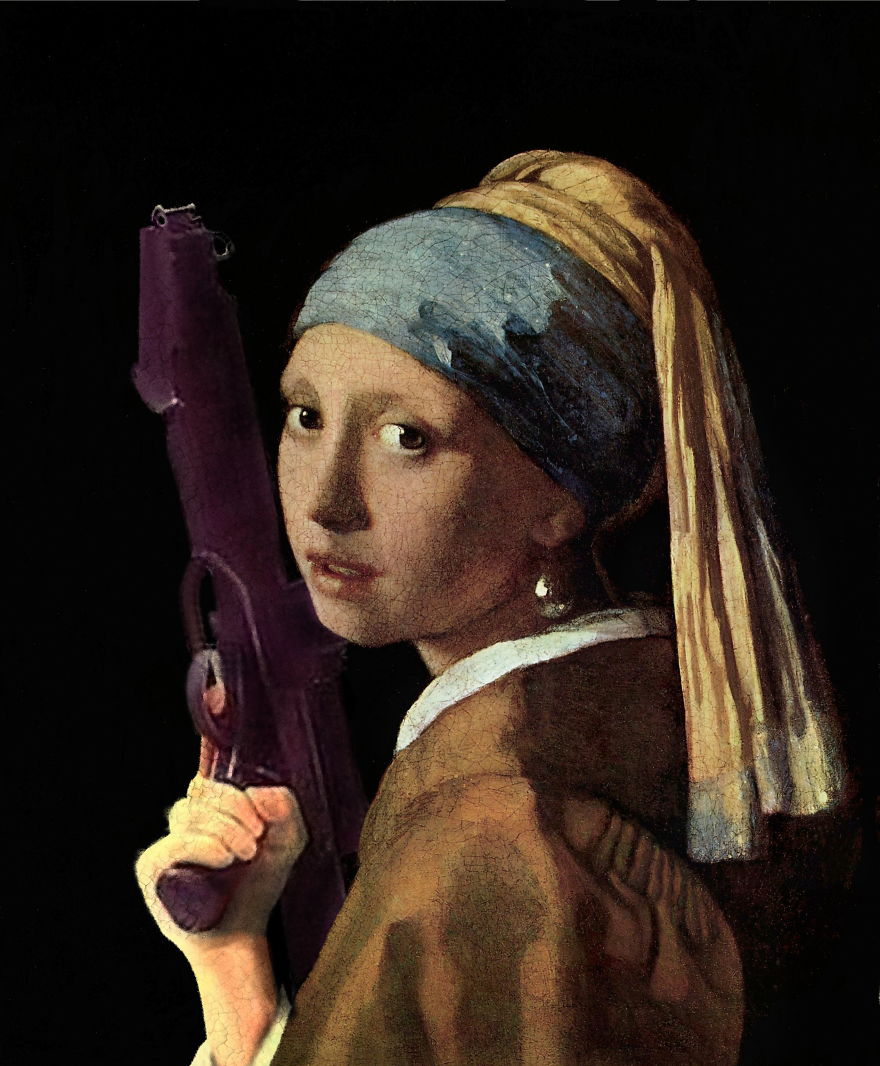

In [250]:
im = Image.open("../../data/images/Girl with an E11 blaster - Johannes Vermeer.jpg")
im

In [52]:
size= im.size
im_gray = im.convert("LA")
#im_gray

In [60]:
pix = np.array(im_gray)[:,:,0]
pix.shape

(1066, 880)

# converting to grayscale

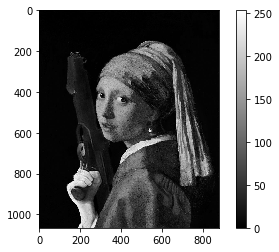

In [54]:
plt.imshow(pix,cmap="gray")
plt.colorbar()

# calculating 3 features for each pixel according to the paper

In [160]:
pix_ext=np.pad(pix, (1, 1), 'symmetric')
pix_ext.shape

(1068, 882)

In [161]:
mid= pix_ext[1:-1,1:-1]
N=pix_ext[0:-2,1:-1]-mid
S=pix_ext[2:,1:-1]-mid
E=pix_ext[1:-1,2:]-mid
W=pix_ext[1:-1,0:-2]-mid
NE = pix_ext[0:-2,2:]-mid
NW=pix_ext[0:-2,0:-2]-mid
SE = pix_ext[2:,2:]-mid
SW=pix_ext[2:,0:-2]-mid

In [162]:
F1=np.sqrt(1./8*( N*N + S*S + E*E + W*W + NE*NE+ NW*NW + SE*SE + SW*SW )).flatten()

In [163]:
F3=(np.sqrt( N*N + S*S + E*E + W*W  )).flatten()

In [175]:
pix_ext=np.pad(pix, (1, 1), 'constant', constant_values=(0, 0))
mid= pix_ext[1:-1,1:-1]
N=pix_ext[0:-2,1:-1]
S=pix_ext[2:,1:-1]
E=pix_ext[1:-1,2:]
W=pix_ext[1:-1,0:-2]
NE = pix_ext[0:-2,2:]
NW=pix_ext[0:-2,0:-2]
SE = pix_ext[2:,2:]
SW=pix_ext[2:,0:-2]
F2=np.abs(1./8*(N+S+E+W+NE+NW+SE+SW) - mid).flatten()
X=np.zeros([len(F3),3])
X[:,0],X[:,1],X[:,2] = F1,F2,F3

# run k-means on the pixels using feature matrix , no. of clusters =2

In [181]:

kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6, max_iter=15).fit(X)

In [186]:
ans=kmeans.predict( X)

In [190]:
ans=ans.reshape(pix.shape)

# result

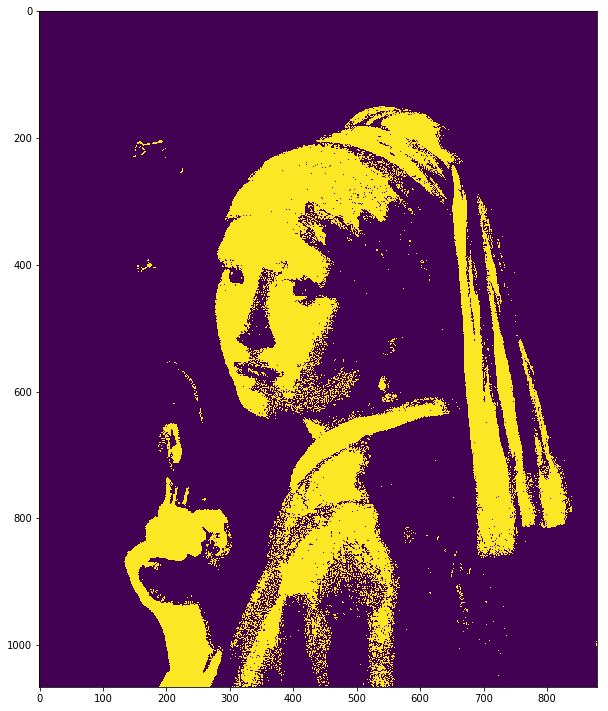

In [247]:
plt.figure(figsize=(10,13))
plt.imshow(ans)

In [252]:
img = Image.fromarray(255*ans)
img.show()